# Code for analyses in Supplementary

In [16]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

## Mediator

### Load results

In [17]:
# Load pickle data in mediator folder
combined = list()
for i in [20, 50, 100, 250, 1000]:
    with open(f'data/mediator/med_{i}.pkl', 'rb') as f:
        df = pickle.load(f)
        df.loc[:, "reps"] = i
        combined.append(df)
mediator_results = pd.concat(combined, ignore_index=True)

In [18]:
mediator_results.head()

,Ground_truth,Eliator,MScausality,reps
0,1.0,1.157988,1.086219,20
1,1.0,0.921433,0.825367,20
2,1.0,1.109314,1.037411,20
3,1.0,1.214447,1.095989,20
4,1.0,1.207346,1.095703,20


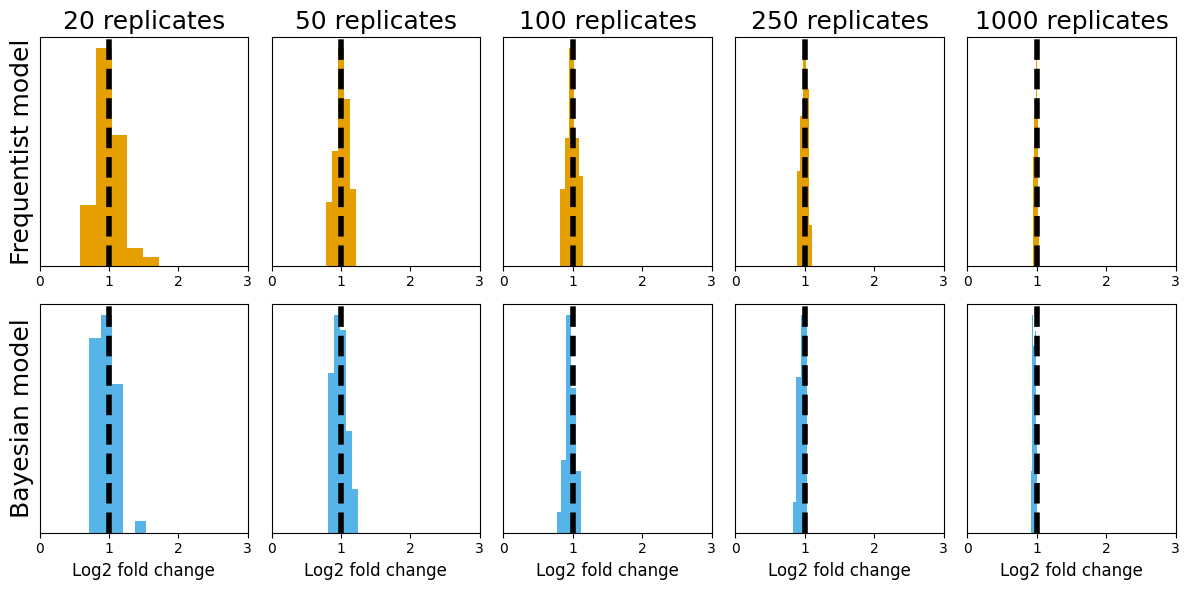

In [15]:
fig, ax = plt.subplots(2,5,figsize=(12,6))

for i in range(5):

    key = [20, 50, 100, 250, 1000][i]

    data = mediator_results[mediator_results["reps"] == key].reset_index(drop=True)

    ax[0, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[0, i].hist(data["Eliator"], 
                  bins=5, color="#E69F00")
    ax[0, i].set_title(f"{key} replicates", size=18)
    ax[0, 0].set_ylabel("Frequentist model", size=18)

    ax[1, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[1, i].hist(data["MScausality"], 
                  bins=5, color="#56B4E9")
    ax[1, 0].set_ylabel("Bayesian model", size=18)
    ax[1, i].set_xlabel("Log2 fold change", size=12)

plt.setp(ax, xlim=(-0,3), yticks=[])
# plt.setp(ax, xlim=(-1,2.5))
plt.tight_layout()


In [24]:
# Load pickle data in mediator folder
combined = list()
for i in [20, 50, 100, 250]:
    with open(f'data/backdoor/bd_{i}.pkl', 'rb') as f:
        df = pickle.load(f)
        df.loc[:, "reps"] = i
        combined.append(df)
bd_results = pd.concat(combined, ignore_index=True)

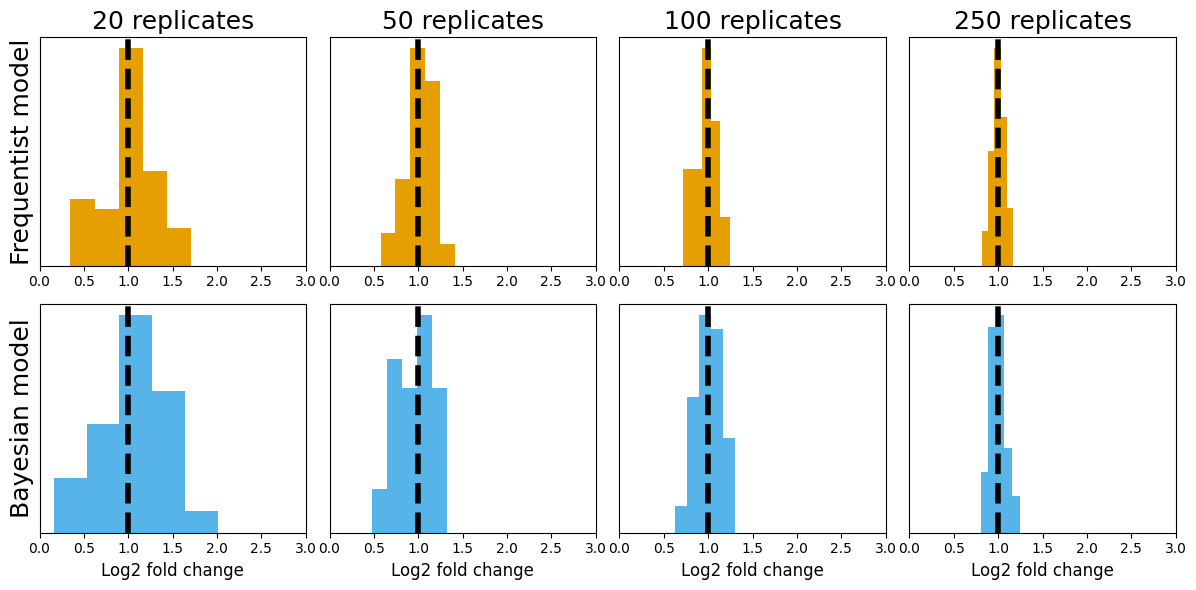

In [25]:
fig, ax = plt.subplots(2,4,figsize=(12,6))

for i in range(4):

    key = [20, 50, 100, 250][i]

    data = bd_results[bd_results["reps"] == key].reset_index(drop=True)

    ax[0, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[0, i].hist(data["Eliator"], 
                  bins=5, color="#E69F00")
    ax[0, i].set_title(f"{key} replicates", size=18)
    ax[0, 0].set_ylabel("Frequentist model", size=18)

    ax[1, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[1, i].hist(data["MScausality"], 
                  bins=5, color="#56B4E9")
    ax[1, 0].set_ylabel("Bayesian model", size=18)
    ax[1, i].set_xlabel("Log2 fold change", size=12)

plt.setp(ax, xlim=(-0,3), yticks=[])
# plt.setp(ax, xlim=(-1,2.5))
plt.tight_layout()
